<a href="https://colab.research.google.com/github/diogenesjusto/FIAP/blob/master/MBAIA/8DTSR/8DTSR_aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 4 - Feature Importance - Permutation

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/diogenesjusto/FIAP/master/Gradua%C3%A7%C3%A3o/dados/dados_arvore_titanic.csv')

# Construção variável dummy (feature de variável categórica)
dummy_sex = pd.get_dummies(df['Sex'])

df['Sex_female'] = dummy_sex['female']

dummy_pclass = pd.get_dummies(df['Pclass'], prefix='Class')
df['Class_1'] = dummy_pclass['Class_1']
df['Class_2'] = dummy_pclass['Class_2']

df['Women_or_Children'] = np.where(
  df['Age']<14,
  1,
  np.where(
      df['Sex_female']==1,
      1,
      0
  )
)

Text(0.5, 0, 'Permutation Importance')

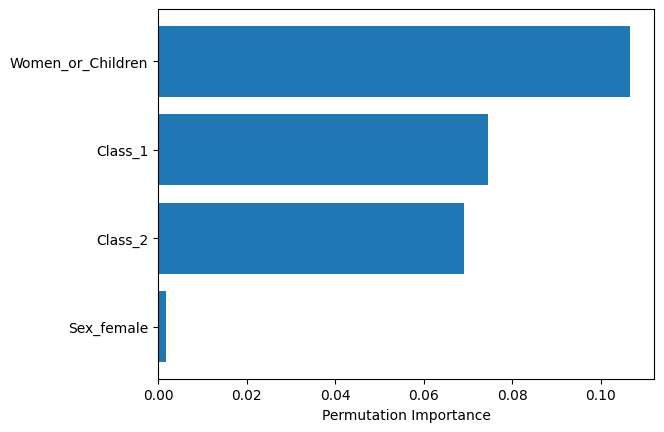

In [52]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X_treino, X_teste, Y_treino, Y_teste = train_test_split(
  df[['Class_1', 'Class_2', 'Sex_female', 'Women_or_Children']],
  df['Survived'],
  test_size=0.25, random_state=2
  )

mod = RandomForestClassifier(random_state=1).fit(X_treino, Y_treino)
#mod = LogisticRegression().fit(X_treino, Y_treino)

# Permutation executa o "papel" do predict, comparando previsão em teste x erro de previsão
perm_importance = permutation_importance(mod, X_teste, Y_teste)

ordem_idx = perm_importance.importances_mean.argsort()
plt.barh(X_teste.columns[ordem_idx], perm_importance.importances_mean[ordem_idx])
plt.xlabel("Permutation Importance")

# Part 2 - Temporal Data - Time Series

In [55]:
pib = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/Data/pib.csv")
pib

# PIB IU: ItauBBA - PIB ItauUnibanco
# Tráfego: BRL, BRP (Tráfego Brasil Leves, Brasil Pesados,... site:https://melhoresrodovias.org.br/)

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi3,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,102.05,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,144.42,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49


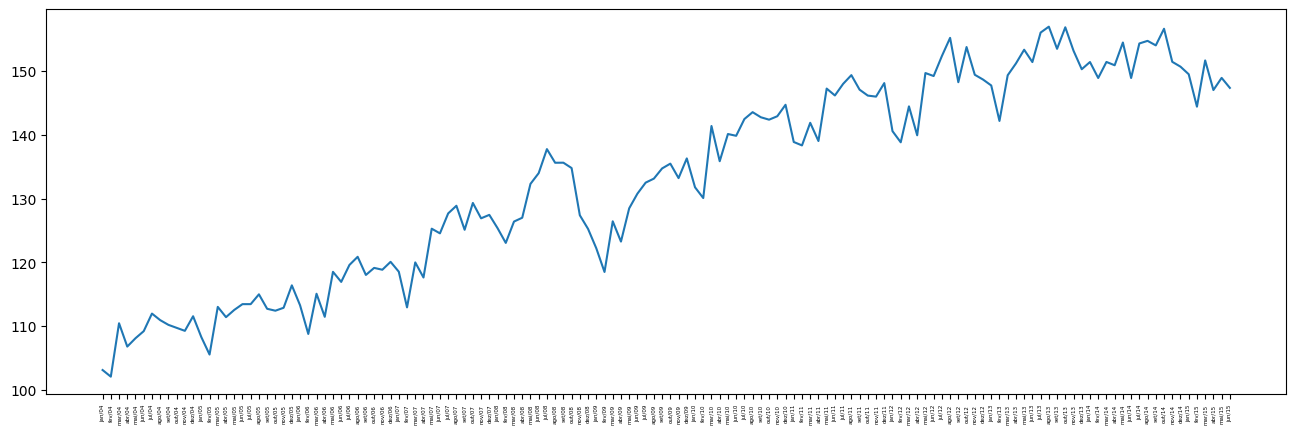

In [64]:
# Visualização da série
plt.figure(figsize=(16,5))
plt.plot(pib['ANO_MES'], pib['PIB'])
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=5)
plt.show()

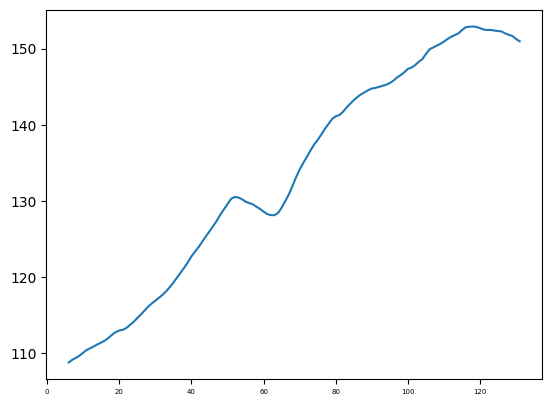

In [67]:
# Decomposição ST
from statsmodels.tsa.seasonal import seasonal_decompose
seasonality = seasonal_decompose(pib['PIB'], period=12) # período é o comprimento entre um evento sazonal e o próximo
plt.plot(seasonality.trend)


In [68]:
# Lag = feature deslocada em relação a variável original
pib['PIBi1_'] = pib['PIB'].shift(1)
pib

,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi4,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05
3,4,abr/04,106.77,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.09,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92,149.51
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,144.42
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.68
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,149.51,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,147.03


In [72]:
# Estatísticas em janelas "deslizantes"
pib['PIB'].rolling(window=3).mean() # média móvel


,PIB
0,NaN
1,NaN
2,105.190000
3,106.416667
4,108.426667
...,...
133,148.210000
134,148.536667
135,147.710000
136,149.216667


# Tratamento de Nulos em Séries Temporais

Problema: em Séries Temporal eliminar uma "linha" não é uma possibilidade por causa das sazonalidades

In [74]:
# Valores nulos: preenchimento em ST
pib.at[3, 'PIB']=np.nan

In [77]:
# Preenchimento do próximo com "anterior"
# Ex: utiliza-se em cálculos financeiros - ex: dólar
pib['PIBt'] = pib['PIB'].fillna(method='ffill')
pib

<ipython-input-77-4a8cee32661e>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pib['PIBt'] = pib['PIB'].fillna(method='ffill')


,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi5,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_,PIBt
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,102.59,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN,103.09
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09,102.05
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05,110.43
3,4,abr/04,NaN,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43,110.43
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,103.91,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77,108.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,154.04,154.75,154.34,148.92,154.49,150.92,151.44,148.92,149.51,144.42
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.44,144.42,151.68
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.68,147.03
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,150.70,151.46,156.65,154.04,154.75,154.34,148.92,154.49,147.03,148.94


In [80]:
# Preenchimento com interpolação
pib['PIBt2'] = pib['PIB'].interpolate()
pib


,Unnamed: 0,ANO_MES,PIB,BRL,BRP,BRT,SLP,SPP,SPT,PRL,...,PIBi6,PIBi7,PIBi8,PIBi9,PIBi10,PIBi11,PIBi12,PIBi1_,PIBt,PIBt2
0,1,jan/04,103.09,109.19,108.67,109.08,102.84,114.27,105.38,127.49,...,102.24,99.96,101.93,101.17,101.70,100.03,100.00,NaN,103.09,103.090
1,2,fev/04,102.05,95.65,104.52,97.63,90.76,109.83,94.99,96.60,...,102.59,102.24,99.96,101.93,101.17,101.70,100.03,103.09,102.05,102.050
2,3,mar/04,110.43,91.69,125.53,99.26,89.78,133.24,99.43,83.79,...,104.52,102.59,102.24,99.96,101.93,101.17,101.70,102.05,110.43,110.430
3,4,abr/04,NaN,95.36,118.34,100.49,94.58,123.55,101.02,91.79,...,106.27,104.52,102.59,102.24,99.96,101.93,101.17,110.43,110.43,109.255
4,5,mai/04,108.08,92.47,121.49,98.96,91.34,128.32,99.55,85.73,...,104.10,106.27,104.52,102.59,102.24,99.96,101.93,106.77,108.08,108.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,fev/15,144.42,147.35,133.73,143.57,147.81,148.96,147.54,157.30,...,154.75,154.34,148.92,154.49,150.92,151.44,148.92,149.51,144.42,144.420
134,135,mar/15,151.68,149.64,163.27,152.09,154.87,179.07,159.56,147.28,...,154.04,154.75,154.34,148.92,154.49,150.92,151.44,144.42,151.68,151.680
135,136,abr/15,147.03,153.81,149.93,152.28,161.21,164.74,161.16,162.21,...,156.65,154.04,154.75,154.34,148.92,154.49,150.92,151.68,147.03,147.030
136,137,mai/15,148.94,149.66,153.03,149.82,157.03,169.39,158.76,149.06,...,151.46,156.65,154.04,154.75,154.34,148.92,154.49,147.03,148.94,148.940
